In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

BUILD_FOLDER = "build"


def get_all_result_files(folder):
    files = [os.path.join(BUILD_FOLDER, x) for x in os.listdir(BUILD_FOLDER) if os.path.isfile(os.path.join(BUILD_FOLDER, x))]
    # Only look at result files
    reg = re.compile(r"\.o")

    result_files = list(filter(reg.search, files))
    return result_files


def get_data():
    result_files = get_all_result_files(BUILD_FOLDER)
    column_labels = ["label", "Matrix Size", "MFlops/s", "Percentage"]
    # df = pd.DataFrame(columns=column_labels)
    data = []
    for file in result_files:
        basename = os.path.basename(file)
        plot_label = basename.split(".")[0]
        # Read file
        f = open(file, "r")
        for x in f:
            if x.startswith("Size"):
                # Read line in
                matrix_size, mflops, percentage = re.findall(r"[-+]?(?:\d*\.*\d+)", x)
                data.append([plot_label, int(matrix_size), float(mflops), float(percentage)])

    df = pd.DataFrame(data, columns=column_labels)
    return df

def plot_df(df):
    # Make two plots, one for MFlops and one for percentages
    import seaborn as sns
    fig, axes = plt.subplots(2,1, figsize=(8,10))

    fig.set_facecolor("gainsboro")
    sns.lineplot(ax= axes[0], data=df, x='Matrix Size', y='Percentage', hue="label")
    sns.lineplot(ax=axes[1], data=df, x='Matrix Size', y='MFlops/s', hue="label")

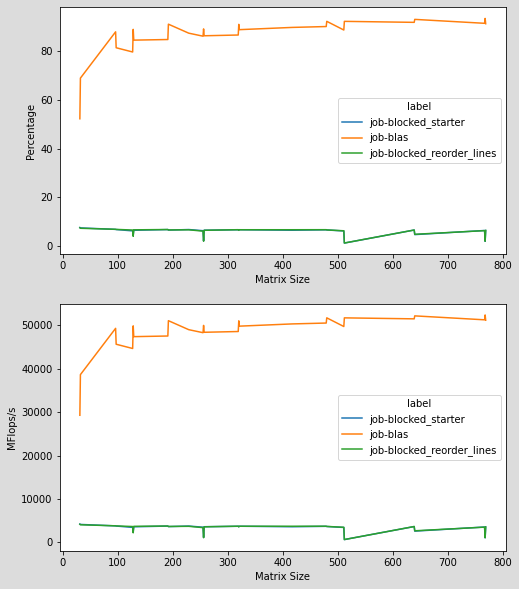

In [72]:
df = get_data()
# print(df.head())
plot_df(df)